# James Griffin 
## 536 Final 


TULIP GERMINATION
Tulips came to the Netherlands in the mid-16th century and quickly become a symbol of the region. To this day, Holland (a region along the west-cost of the Netherlands) is known as the “flower shop of the world.” Each year, around the end of April, hundreds of thousands of visitors from around the world flock to the region to participate in local tulip festivals bringing in millions of dollars of revenue for the region. Further, tulip exports account for approximately 25% of agricultural exports for the region.
Tulips are typically planted in the late Fall allowing for the bulb to go through a “chilling period” prior to blooming. Further, ideal growing conditions for tulips are in light, airy, well- drained soil. Once blooming begins, tulips require plenty of sunshine to reach full growth.
Alarmingly, climate change is striking the Netherlands particularly hard. The temperature is expected to rise at about twice the global average and precipitation is expected in increase. Further, with rising sea levels and the fact that 1/3 of the Netherlands is actually below sea level raises the risk of flooding to the area. In all, climate change threatens Netherlands tulip economy.
Over the past several years, researchers have been studying various species of tulips to un- derstand which species under which conditions are ideal for expected climate conditions moving forward. In one such experiment, 210 tulip bulbs of 12 different species (2510 bulbs total) were randomly split into 7 different treatment groups (30 bulbs per group per species). Each group was then assigned a chilling time of 0, 2, 4, . . . , 12 weeks (in a lab refrigerator) after which the seeds were planted in separate pots in a greenhouse. The bulbs were then monitored to see if they germinated (bloomed) or not.
In this analysis, you are required to answer the following questions:
1. What is the effect of chilling time for the different species of tulips? Is it the same across the species? Which species are the same/different?
2. Is there an ideal chilling time for each species? If so, is it the same for all species?
3. Given climate change conditions, winters are expected to decrease from 10 to 8 weeks, on average. What effect will this decrease in chilling time have on the probability of germina- tion for each species? Is it the same for all species?

For this project:
* You must work on your own
* I will help debug coding errors only (your code must throw an error) • Schedule a time during finals week to come present your final
* Give an answer to each of the research questions
* Follow the course case study rubric

In [209]:
## Importing 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings; warnings.simplefilter('ignore')

In [18]:
data = pd.read_csv("../data/Germination.csv")
data.head()

,Unnamed: 0,Population,YearCollected,DayCollected,ChillingTime,Germinated
0,1,12,2017,267,0,N
1,2,12,2017,267,0,N
2,3,12,2017,267,0,N
3,4,12,2017,267,0,N
4,5,12,2017,267,0,N


In [19]:
#each population has 210 results 
data.Population.value_counts()

11    210
9     210
7     210
5     210
3     210
1     210
12    210
10    210
8     210
6     210
4     210
2     210
Name: Population, dtype: int64

In [20]:
data.ChillingTime.value_counts()

12    360
10    360
8     360
6     360
4     360
2     360
0     360
Name: ChillingTime, dtype: int64

In [21]:
data.Germinated.value_counts()
#okso pretty balanced going to turn this to 0 and 1 tho
data['Germinated'] = data.Germinated.apply(lambda x: 1 if x == 'Y' else 0)


#### Is the probability of germination for each chilling time the same across all populations? Which populations are same/different?

In [22]:
data.head()

,Unnamed: 0,Population,YearCollected,DayCollected,ChillingTime,Germinated
0,1,12,2017,267,0,0
1,2,12,2017,267,0,0
2,3,12,2017,267,0,0
3,4,12,2017,267,0,0
4,5,12,2017,267,0,0


In [23]:
pops = data.groupby(by = ['Population', 'ChillingTime'])
pops.head(10)

,Unnamed: 0,Population,YearCollected,DayCollected,ChillingTime,Germinated
0,1,12,2017,267,0,0
1,2,12,2017,267,0,0
2,3,12,2017,267,0,0
3,4,12,2017,267,0,0
4,5,12,2017,267,0,0
...,...,...,...,...,...,...
2275,2276,1,2015,138,12,1
2276,2277,1,2015,138,12,1
2277,2278,1,2015,138,12,1
2278,2279,1,2015,138,12,1


In [95]:
g1 = data.loc[data.Germinated == 1]

In [64]:
m2 = pd.DataFrame(data.groupby(['Germinated', 'Population'])[ 
                                               'ChillingTime'].mean())

#m2.sort_values(by='Population', ascending=False).head(10)

In [268]:
m3 = pd.DataFrame(g1.groupby(['Germinated', 'Population'])[ 
                                               'ChillingTime'].mean())



In [269]:
m3.sort_values(by='Population', ascending=True).head(50)


ChillingTime
Germinated Population              
1          1               6.528736
           2               7.248227
           3               7.428571
           4               8.109091
           5               5.969466
           6               9.250000
           7               9.361111
           8               7.914894
           9              10.842105
           10              8.772277
           11              8.944444

In [277]:
new_row = {'Germinated':1, 'Population':11, 'ChilliingTime':0,}
m4 = pd.DataFrame(m3).reset_index().append([1,12,0], ignore_index=True)

In [288]:
m4 = m3.reset_index()

In [291]:
m5 = m4.append(pd.DataFrame([[1,12,0]], columns
=m4.columns))

In [293]:
m5.sort_values(by='Population', ascending=True).head(50)

,Germinated,Population,ChillingTime
0,1,1,6.528736
1,1,2,7.248227
2,1,3,7.428571
3,1,4,8.109091
4,1,5,5.969466
5,1,6,9.250000
6,1,7,9.361111
7,1,8,7.914894
8,1,9,10.842105
9,1,10,8.772277


In [26]:
popd = pd.get_dummies(data.Population)
popd['ct'] = data.ChillingTime

In [71]:
#I think to answer this question create interactions between populatiton and chilltime and then compare ANOVA plots w/ 
#F statistics on a regression without the interactions, then inturpret the F statistics 

'''
I dont really know how else to do this, there has gotta be a function i was just gonna code up a function'''

def make_int(df):
    one  =  [] #pontiac
    two  = [] #saab
    three = [] #buick
    four = [] #chevy
    five = []#saturn 
    six= []  #cadalac
    seven = []
    eight = []
    nine = []
    ten = []
    el = []
    tw = []
    overall= [] 
    
    
    for i in range(len(df)):
        if df.Population[i] == 1:
            one.append(df.ChillingTime[i])
            two.append(0)
            three.append(0)
            four.append(0)
            five.append(0)
            six.append(0)
            seven.append(0)
            eight.append(0)
            nine.append(0)
            ten.append(0)
            el.append(0)
            tw.append(0)
            overall.append('1*chill')
            
        elif df.Population[i] == 2:
            one.append(0)
            two.append(df.ChillingTime[i])
            three.append(0)
            four.append(0)
            five.append(0)
            six.append(0)
            seven.append(0)
            eight.append(0)
            nine.append(0)
            ten.append(0)
            el.append(0)
            tw.append(0)
            overall.append('2*chill')
            
        elif df.Population[i] == 3:
            one.append(0)
            two.append(0)
            three.append(df.ChillingTime[i])
            four.append(0)
            five.append(0)
            six.append(0)
            seven.append(0)
            eight.append(0)
            nine.append(0)
            ten.append(0)
            el.append(0)
            tw.append(0)
            overall.append('3*chill')
            
        elif df.Population[i] == 4:
            one.append(0)
            two.append(0)
            three.append(0)
            four.append(df.ChillingTime[i])
            five.append(0)
            six.append(0)
            seven.append(0)
            eight.append(0)
            nine.append(0)
            ten.append(0)
            el.append(0)
            tw.append(0)
            overall.append('4*chill')
            
        elif df.Population[i] == 5:
            one.append(0)
            two.append(0)
            three.append(0)
            four.append(0)
            five.append(df.ChillingTime[i])
            six.append(0)
            seven.append(0)
            eight.append(0)
            nine.append(0)
            ten.append(0)
            el.append(0)
            tw.append(0)
            overall.append('5*chill')
            
        elif df.Population[i] == 6:
            one.append(0)
            two.append(0)
            three.append(0)
            four.append(0)
            five.append(0)
            six.append(df.ChillingTime[i])
            seven.append(0)
            eight.append(0)
            nine.append(0)
            ten.append(0)
            el.append(0)
            tw.append(0)
            overall.append('6*chill')
        
        elif df.Population[i] == 7:
            one.append(0)
            two.append(0)
            three.append(0)
            four.append(0)
            five.append(0)
            six.append(0)
            seven.append(df.ChillingTime[i])
            eight.append(0)
            nine.append(0)
            ten.append(0)
            el.append(0)
            tw.append(0) 
            overall.append('7*chill')
            
        elif df.Population[i] == 8:
            one.append(0)
            two.append(0)
            three.append(0)
            four.append(0)
            five.append(0)
            six.append(0)
            seven.append(0)
            eight.append(df.ChillingTime[i])
            nine.append(0)
            ten.append(0)
            el.append(0)
            tw.append(0)
            overall.append('8*chill')
        
        elif df.Population[i] == 9:
            one.append(0)
            two.append(0)
            three.append(0)
            four.append(0)
            five.append(0)
            six.append(0)
            seven.append(0)
            eight.append(0)
            nine.append(df.ChillingTime[i])
            ten.append(0)
            el.append(0)
            tw.append(0)
            overall.append('9*chill')
            
        elif df.Population[i] == 10:
            one.append(0)
            two.append(0)
            three.append(0)
            four.append(0)
            five.append(0)
            six.append(0)
            seven.append(0)
            eight.append(0)
            nine.append(0)
            ten.append(df.ChillingTime[i])
            el.append(0)
            tw.append(0)
            overall.append('10*chill')
            
        elif df.Population[i] == 11:
            one.append(0)
            two.append(0)
            three.append(0)
            four.append(0)
            five.append(0)
            six.append(0)
            seven.append(0)
            eight.append(0)
            nine.append(0)
            ten.append(0)
            el.append(df.ChillingTime[i])
            tw.append(0)
            overall.append('11*chill')
            
        else: #cadallac case 
            one.append(0)
            two.append(0)
            three.append(0)
            four.append(0)
            five.append(0)
            six.append(0)
            seven.append(0)
            eight.append(0)
            nine.append(0)
            ten.append(0)
            el.append(0)
            tw.append(df.ChillingTime[i])
            overall.append('12*chill')
    
    df['1*cill'] = one
    df['2*chill'] = two
    df['3*chill'] = three
    df['4*chill'] = four
    df['5*chill'] = five
    df['6*chill']  = six
    df['7*chill'] = seven
    df['8*chill'] = eight
    df['9*chill'] = nine
    df['10*chill'] = ten
    df['11*chill'] = el
    df['12*chill'] = tw
    df['pop*chill'] = overall
    
    return  df 

In [72]:
data2 = make_int(data)

In [73]:
data2.columns

Index(['Unnamed: 0', 'Population', 'YearCollected', 'DayCollected',
       'ChillingTime', 'Germinated', '1*cill', '2*chill', '3*chill', '4*chill',
       '5*chill', '6*chill', '7*chill', '8*chill', '9*chill', '10*chill',
       '11*chill', '12*chill', 'pop*chill'],
      dtype='object')

In [30]:
popd = pd.get_dummies(data.Population)
data2 = data2.drop(columns = ['Unnamed: 0', 'Population'],
                  axis = 1)

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

X3 = data2[['ChillingTime',
            '1*cill', '2*chill', '3*chill', 
            '4*chill','5*chill', '6*chill', '7*chill', 
            '8*chill', '9*chill', '10*chill','11*chill', 
            '12*chill' 
           ]]
m = data.ChillingTime
y = data.Germinated
reg_obj1 = sm.OLS(y ,m)
reg_obj2 = sm.OLS(y, X3)

results1 = reg_obj1.fit()
results2 = reg_obj2.fit()

anovaResults = anova_lm(results1, results2)
print(anovaResults)

   df_resid         ssr  df_diff     ss_diff          F         Pr(>F)
0    2519.0  543.476160      0.0         NaN        NaN            NaN
1    2508.0  432.809158     11.0  110.667002  58.298389  1.327511e-115


In [31]:
data.Germinated

0       0
1       0
2       0
3       0
4       0
       ..
2515    1
2516    1
2517    1
2518    1
2519    0
Name: Germinated, Length: 2520, dtype: int64

In [32]:
germ_prob = data.groupby('Germinated').size().div(len(data))
germ_prob

Germinated
0    0.561508
1    0.438492
dtype: float64

In [43]:
prob_germ = data.groupby(['Population', 'ChillingTime', 'Germinated']).size().div(
    len(data)).div(germ_prob, axis=0, level='Germinated')


In [101]:
prob_germ[:50]

Population  ChillingTime  Germinated
1           0             0             0.012721
                          1             0.010860
            2             0             0.000707
                          1             0.026244
            4             0             0.003534
                          1             0.022624
            6             0             0.002827
                          1             0.023529
            8             0             0.002827
                          1             0.023529
            10            0             0.000707
                          1             0.026244
            12            0             0.002120
                          1             0.024434
2           0             0             0.018375
                          1             0.003620
            2             0             0.009894
                          1             0.014480
            4             0             0.005654
                          1     

In [56]:
#prob_germ[50:100]

In [45]:
0.012721+0.010860+0.000707+0.026244+0.003534+0.022624+0.002827+0.023529+0.002827+0.023529+0.000707+0.026244+0.002120+0.024434

0.18290700000000001

In [294]:
tab = pd.crosstab(data.Population, data.Germinated,
            margins=True, normalize="index")

In [316]:
vals = m5.ChillingTime.to_list()
vals.append(np.mean(m5.ChillingTime))
tab['chillingtime'] = vals

In [317]:
tab

Germinated,0,1,chillingtime
Population,,,
1,0.171429,0.828571,6.528736
2,0.328571,0.671429,7.248227
3,0.300000,0.700000,7.428571
4,0.476190,0.523810,8.109091
5,0.376190,0.623810,5.969466
6,0.657143,0.342857,9.250000
7,0.657143,0.342857,9.361111
8,0.776190,0.223810,7.914894
9,0.819048,0.180952,10.842105


In [94]:
data2.groupby('pop*chill')['Germinated'].value_counts() / data.groupby('pop*chill')['Germinated'].count()


pop*chill  Germinated
1*chill    1             0.828571
           0             0.171429
10*chill   0             0.519048
           1             0.480952
11*chill   0             0.657143
           1             0.342857
12*chill   0             1.000000
2*chill    1             0.671429
           0             0.328571
3*chill    1             0.700000
           0             0.300000
4*chill    1             0.523810
           0             0.476190
5*chill    1             0.623810
           0             0.376190
6*chill    0             0.657143
           1             0.342857
7*chill    0             0.657143
           1             0.342857
8*chill    0             0.776190
           1             0.223810
9*chill    0             0.819048
           1             0.180952
Name: Germinated, dtype: float64

In [106]:
cond_probs = data.groupby(['Population', 'ChillingTime'])['Germinated'].value_counts(normalize=True)

In [111]:
cond_probs = pd.DataFrame(cond_probs).rename(columns = {'Germinated':"Probabilities"})
cond_probs = cond_probs.reset_index()

In [329]:
cond_probs[81:93]

,Population,ChillingTime,Germinated,Probabilities
81,7,0,0,1.000000
82,7,2,0,1.000000
83,7,4,0,0.900000
84,7,4,1,0.100000
85,7,6,0,0.666667
86,7,6,1,0.333333
87,7,8,0,0.533333
88,7,8,1,0.466667
89,7,10,1,0.833333
90,7,10,0,0.166667


In [341]:
g2 = cond_probs.loc[cond_probs.Germinated == 1]
g2 = g2.loc[g2.Probabilities >= .8]

In [343]:
g2
g3 = g2.loc[g2.ChillingTime >= 8]

In [344]:
g3

,Population,ChillingTime,Germinated,Probabilities
8,1,8,1,0.866667
10,1,10,1,0.966667
12,1,12,1,0.900000
22,2,8,1,0.833333
24,2,10,1,0.900000
26,2,12,1,0.833333
35,3,8,1,0.966667
37,3,10,1,0.900000
39,3,12,1,0.866667
50,4,10,1,0.900000


In [339]:
sec = data2.loc[data2.Population ==6]
third = data2.loc[data2.Population ==7]

X2_3 = pd.concat([sec, third], axis = 0)

X23 = X2_3[['ChillingTime',
            '6*chill', '7*chill', 
           ]]

X23

,ChillingTime,6*chill,7*chill
40,0,0,0
41,0,0,0
42,0,0,0
43,0,0,0
44,0,0,0
...,...,...,...
2485,12,0,12
2486,12,0,12
2487,12,0,12
2488,12,0,12


In [340]:
m = X23.ChillingTime
y = X2_3.Germinated
reg_obj1 = sm.OLS(y ,m)
reg_obj2 = sm.OLS(y, X23)

results1 = reg_obj1.fit()
results2 = reg_obj2.fit()

anovaResults = anova_lm(results1, results2)
print(anovaResults)

   df_resid        ssr  df_diff  ss_diff         F   Pr(>F)
0     419.0  61.783883      0.0      NaN       NaN      NaN
1     418.0  61.780952      1.0  0.00293  0.019827  0.88809


In [125]:
.85*30

25.5

In [129]:
data3 = data[["Population", "YearCollected", "DayCollected",
             'ChillingTime', "Germinated"]]

In [132]:
data3.tail()

,Population,YearCollected,DayCollected,ChillingTime,Germinated
2515,1,2015,138,12,1
2516,1,2015,138,12,1
2517,1,2015,138,12,1
2518,1,2015,138,12,1
2519,1,2015,138,12,0


In [134]:
((data3.DayCollected//30)+1)*4

0       36
1       36
2       36
3       36
4       36
        ..
2515    20
2516    20
2517    20
2518    20
2519    20
Name: DayCollected, Length: 2520, dtype: int64

In [135]:
data3.DayCollected.value_counts()

204    420
267    210
203    210
191    210
161    210
230    210
202    210
198    210
164    210
162    210
138    210
Name: DayCollected, dtype: int64

In [158]:
((data3.DayCollected//30)+1)*4

0       36
1       36
2       36
3       36
4       36
        ..
2515    20
2516    20
2517    20
2518    20
2519    20
Name: DayCollected, Length: 2520, dtype: int64

In [157]:
data3.DayCollected/7

0       38.142857
1       38.142857
2       38.142857
3       38.142857
4       38.142857
          ...    
2515    19.714286
2516    19.714286
2517    19.714286
2518    19.714286
2519    19.714286
Name: DayCollected, Length: 2520, dtype: float64

In [159]:
data3['week'] = data3.DayCollected/7

<ipython-input-159-984e95511dbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['week'] = data3.DayCollected/7


In [161]:
import datetime

data3.head()

,Population,YearCollected,DayCollected,ChillingTime,Germinated,week
0,12,2017,267,0,0,38.142857
1,12,2017,267,0,0,38.142857
2,12,2017,267,0,0,38.142857
3,12,2017,267,0,0,38.142857
4,12,2017,267,0,0,38.142857


In [164]:
data3.YearCollected.unique()

array([2017, 2014, 2016, 2015, 2013])

In [183]:
pop_dum = pd.get_dummies(data3.Population)


In [184]:
data4 = pd.concat([data3, pop_dum], axis = 1)

In [186]:
data4.columns

Index([   'Population', 'YearCollected',  'DayCollected',  'ChillingTime',
          'Germinated',          'week',          'year',               1,
                     2,               3,               4,               5,
                     6,               7,               8,               9,
                    10,              11,              12],
      dtype='object')

In [205]:
data5 = data4[['week', 'YearCollected', 'ChillingTime', 'Population',
               1,2,3,4,5,6,7,8,9,10,11,12]]
y = data4.Germinated

In [199]:

reg_obj = sm.Logit(y ,data5)

results = reg_obj.fit()
print(results.summary())

         Current function value: 0.450370
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             Germinated   No. Observations:                 2520
Model:                          Logit   Df Residuals:                     2507
Method:                           MLE   Df Model:                           12
Date:                Wed, 21 Apr 2021   Pseudo R-squ.:                  0.3431
Time:                        01:03:29   Log-Likelihood:                -1134.9
converged:                      False   LL-Null:                       -1727.6
Covariance Type:            nonrobust   LLR p-value:                2.453e-246
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
week             -1.2220   9.36e+04  -1.31e-05      1.000   -1.84e+05    1.84e+05
YearCollected     0.0147    114.137      0.000      1.00

/Users/a13855/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data5, y, test_size=0.3, 
                                                    random_state = 42,
                                                    stratify=data5.Population)

X_train.drop(columns = ['Population'], inplace = True)
X_test.drop(columns = ['Population'], inplace = True)



solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2', 'l1', 'elasitcnet']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)


logreg = LogisticRegression()


{'solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'penalty': ['l2', 'l1', 'elasitcnet'],
 'C': [1000, 100, 10, 1.0, 0.1, 0.01]}

In [224]:
from sklearn.model_selection import RandomizedSearchCV
grid_search = RandomizedSearchCV(estimator=logreg, param_distributions= grid, n_jobs=-1, cv=3, 
                                 scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [225]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.789116 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}


In [248]:
clf = LogisticRegression(n_jobs=-1, C=.1)

In [249]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, n_jobs=-1)

In [255]:
X_train.columns.tolist()

['week',
 'YearCollected',
 'ChillingTime',
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12]

In [256]:
sorted(list(zip(X_train.columns.tolist(), clf.coef_[0])), key=lambda x: x[1])

[(9, -0.8270935247210046),
 (4, -0.6010182033364623),
 (12, -0.36129123575406047),
 ('week', -0.3149416786854205),
 (5, -0.29070229926104),
 (1, -0.020319781992764036),
 (11, -0.0011085443408862079),
 ('YearCollected', 0.0031950044896068425),
 (6, 0.03843892514411445),
 (7, 0.199124257285629),
 (8, 0.20891088427435897),
 (3, 0.2431872998196667),
 ('ChillingTime', 0.3003424010271868),
 (10, 0.42173456663244174),
 (2, 0.991924998666467)]

In [251]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix


y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,))

accuracy 0.798941798941799
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       432
           1       0.78      0.74      0.76       324

    accuracy                           0.80       756
   macro avg       0.80      0.79      0.79       756
weighted avg       0.80      0.80      0.80       756



In [258]:
np.exp(0.3003424010271868)

1.3503210797549925

### ok so from reversing the linear transform that we do to create the logistic regression in the first place -- we get that the "inturpretagble" coefficient on ChillingTime which was .30, when we raise that to the e we bet 1.35 --> . So for for every week that we shorten the chillng period for the blossoms, we decrease their probability of germinating by 1.35% 

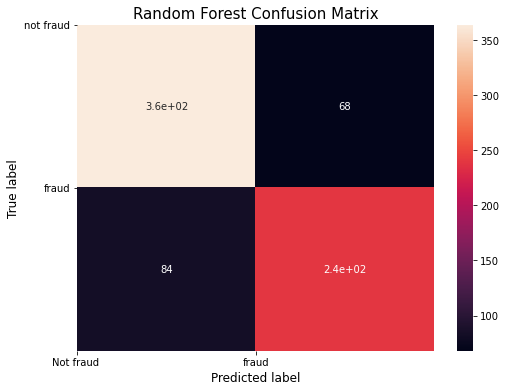

[[364  84]
 [ 68 240]]


In [349]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns 
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    f, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True)
    plt.title('Confusion Matrix', fontsize=15)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    plt.xticks([0, 1],
           ['Not fraud ','fraud'])
    plt.yticks([0, 1],
           ['not fraud','fraud'], rotation = 0)
    
plot_confusion_matrix(y_test, y_pred)
plt.title("Random Forest Confusion Matrix", fontsize = 15)
plt.show()




confusion_matrix = confusion_matrix(y_pred, y_test)
print(confusion_matrix)

In [351]:
10**(-1.35)

0.0446683592150963

In [352]:
np.exp(0.3003424010271868) / ( 1 + np.exp(0.3003424010271868) )

0.5745262174544066

In [353]:
X2_3.columns

Index(['Unnamed: 0', 'Population', 'YearCollected', 'DayCollected',
       'ChillingTime', 'Germinated', '1*cill', '2*chill', '3*chill', '4*chill',
       '5*chill', '6*chill', '7*chill', '8*chill', '9*chill', '10*chill',
       '11*chill', '12*chill', 'pop*chill'],
      dtype='object')

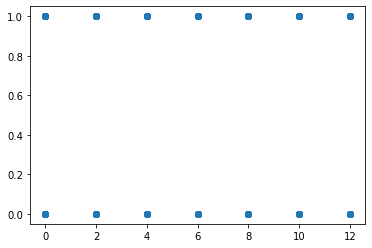